<a href="https://colab.research.google.com/github/sakina-k-ali/crazyflie-codes/blob/main/Copy_of_countobjects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install jupyter


In [ ]:
!pip install jupyter_http_over_ws
!jupyter serverextension enable --py jupyter_http_over_ws


Enabling: jupyter_http_over_ws
- Writing config: /root/.jupyter
    - Validating...
      jupyter_http_over_ws 0.0.7 OK


In [ ]:
# Install the necessary libraries
!pip install ultralytics opencv-python


In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow


In [ ]:
model = YOLO("yolov8x.pt")  # Use the extra-large model for better accuracy


In [ ]:
!pip install ultralytics


In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # To show images in Colab
import cv2
import torch
import matplotlib.pyplot as plt


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Wx5zNgkep39npo5AOW0n")  # Make sure your API key is correct
project = rf.workspace("sakinas-senior-design").project("item-count")
version = project.version(1)

# Download dataset in YOLOv8 format
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from google.colab import files

# Upload the file manually
uploaded = files.upload()


Saving item count.v1i.yolov8.zip to item count.v1i.yolov8.zip


In [ ]:
import zipfile
import os

# Define paths
zip_path = "/content/item count.v1i.yolov8.zip"  # Update if needed
extract_folder = "/content/item-count"

# Extract the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Check extracted files
print("Extracted files:", os.listdir(extract_folder))


Extracted files: ['train', 'valid', 'README.dataset.txt', 'data.yaml', 'README.roboflow.txt']


In [ ]:
yaml_path = "/content/item-count/data.yaml"  # Adjust if needed

with open(yaml_path, "r") as f:
    print(f.read())  # Print contents of the YAML file


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['can']

roboflow:
  workspace: sakinas-senior-design
  project: item-count
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/sakinas-senior-design/item-count/dataset/1


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # Load YOLOv8 model
model.train(data="/content/item-count/data.yaml", epochs=50, imgsz=640)


Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/item-count/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

100%|██████████| 755k/755k [00:00<00:00, 20.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/item-count/train/labels... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<00:00, 1218.41it/s]

train: New cache created: /content/item-count/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/item-count/valid/labels... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<00:00, 2544.06it/s]

val: New cache created: /content/item-count/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.707      3.227      1.752        288        640: 100%|██████████| 1/1 [00:13<00:00, 13.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all          3         49     0.0489      0.898      0.116     0.0387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.673      3.131      1.714        237        640: 100%|██████████| 1/1 [00:07<00:00,  7.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all          3         49       0.05      0.918      0.126     0.0412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.628      3.062      1.686        227        640: 100%|██████████| 1/1 [00:05<00:00,  5.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all          3         49     0.0511      0.939      0.158     0.0502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.553      3.124      1.583        259        640: 100%|██████████| 1/1 [00:05<00:00,  5.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all          3         49     0.0522      0.959      0.176     0.0578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.369      2.979      1.512        221        640: 100%|██████████| 1/1 [00:05<00:00,  5.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all          3         49     0.0533       0.98      0.233     0.0711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.501      3.123      1.491        382        640: 100%|██████████| 1/1 [00:05<00:00,  5.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all          3         49     0.0544          1      0.352     0.0973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.417      2.844      1.443        283        640: 100%|██████████| 1/1 [00:05<00:00,  5.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all          3         49     0.0544          1      0.322      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.351      2.865       1.37        347        640: 100%|██████████| 1/1 [00:05<00:00,  5.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          3         49     0.0544          1      0.258      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.353       2.39      1.364        213        640: 100%|██████████| 1/1 [00:05<00:00,  5.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all          3         49     0.0544          1      0.276       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.272      2.309      1.297        268        640: 100%|██████████| 1/1 [00:05<00:00,  5.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all          3         49     0.0544          1      0.284      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.322       2.28      1.279        323        640: 100%|██████████| 1/1 [00:05<00:00,  5.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all          3         49     0.0544          1      0.338      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.302      2.001      1.285        277        640: 100%|██████████| 1/1 [00:05<00:00,  5.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all          3         49     0.0544          1      0.454      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G       1.31      1.732      1.263        246        640: 100%|██████████| 1/1 [00:05<00:00,  5.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all          3         49     0.0953      0.735      0.614      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.352      1.544      1.312        176        640: 100%|██████████| 1/1 [00:05<00:00,  5.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all          3         49          1      0.193      0.745      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.359      1.582      1.278        334        640: 100%|██████████| 1/1 [00:05<00:00,  5.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all          3         49          1      0.321      0.803      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G       1.26      1.284      1.234        222        640: 100%|██████████| 1/1 [00:05<00:00,  5.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all          3         49          1      0.406      0.818      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.275      1.261      1.256        244        640: 100%|██████████| 1/1 [00:05<00:00,  5.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all          3         49          1      0.462      0.837      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.316      1.177      1.266        238        640: 100%|██████████| 1/1 [00:05<00:00,  5.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all          3         49          1      0.462      0.837      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.349      1.189      1.248        306        640: 100%|██████████| 1/1 [00:05<00:00,  5.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all          3         49      0.959      0.475      0.873      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.272      1.275      1.252        381        640: 100%|██████████| 1/1 [00:05<00:00,  5.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all          3         49      0.959      0.475      0.873      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G       1.26      1.164      1.297        205        640: 100%|██████████| 1/1 [00:05<00:00,  5.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all          3         49       0.96      0.493      0.887      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.204      1.151      1.208        361        640: 100%|██████████| 1/1 [00:05<00:00,  5.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all          3         49       0.96      0.493      0.887      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.284      1.096      1.254        221        640: 100%|██████████| 1/1 [00:05<00:00,  5.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all          3         49       0.96      0.493      0.907      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.245     0.9796      1.216        285        640: 100%|██████████| 1/1 [00:05<00:00,  5.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          3         49       0.96      0.493      0.907      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.253      1.073      1.242        299        640: 100%|██████████| 1/1 [00:05<00:00,  5.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all          3         49      0.953      0.551      0.924      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.197     0.8983      1.202        281        640: 100%|██████████| 1/1 [00:05<00:00,  5.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all          3         49      0.953      0.551      0.924      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.299       1.05      1.327        190        640: 100%|██████████| 1/1 [00:05<00:00,  5.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all          3         49          1      0.669      0.915      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.202     0.9394      1.205        286        640: 100%|██████████| 1/1 [00:05<00:00,  5.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all          3         49          1      0.669      0.915      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G       1.28     0.9039      1.246        256        640: 100%|██████████| 1/1 [00:05<00:00,  5.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all          3         49      0.973      0.724      0.908      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.238     0.9176      1.217        325        640: 100%|██████████| 1/1 [00:05<00:00,  5.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all          3         49      0.973      0.724      0.908      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.202     0.9454      1.233        221        640: 100%|██████████| 1/1 [00:05<00:00,  5.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all          3         49       0.89      0.662      0.864      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.223     0.9172      1.252        279        640: 100%|██████████| 1/1 [00:05<00:00,  5.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all          3         49       0.89      0.662      0.864      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.201     0.8583      1.207        270        640: 100%|██████████| 1/1 [00:05<00:00,  5.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all          3         49      0.823      0.653      0.847      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.212     0.8629      1.221        324        640: 100%|██████████| 1/1 [00:07<00:00,  7.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all          3         49      0.823      0.653      0.847      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.281     0.9529      1.279        214        640: 100%|██████████| 1/1 [00:05<00:00,  5.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all          3         49      0.845      0.694       0.85      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.218     0.8854      1.233        349        640: 100%|██████████| 1/1 [00:05<00:00,  5.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all          3         49      0.845      0.694       0.85      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.228     0.9358      1.257        280        640: 100%|██████████| 1/1 [00:05<00:00,  5.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all          3         49      0.828      0.714      0.844      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.197     0.8733      1.254        230        640: 100%|██████████| 1/1 [00:05<00:00,  5.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all          3         49      0.828      0.714      0.844      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G       1.23     0.8731      1.248        249        640: 100%|██████████| 1/1 [00:05<00:00,  5.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all          3         49      0.818      0.714      0.852      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.203     0.8515      1.229        221        640: 100%|██████████| 1/1 [00:05<00:00,  5.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all          3         49      0.818      0.714      0.852      0.532


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.157     0.8463      1.205        176        640: 100%|██████████| 1/1 [00:05<00:00,  5.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all          3         49      0.814      0.735      0.859      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.142     0.8229      1.188        173        640: 100%|██████████| 1/1 [00:05<00:00,  5.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all          3         49      0.814      0.735      0.859      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.122     0.8012       1.17        176        640: 100%|██████████| 1/1 [00:05<00:00,  5.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all          3         49      0.937      0.714      0.881      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.151     0.8022      1.185        175        640: 100%|██████████| 1/1 [00:05<00:00,  5.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all          3         49      0.937      0.714      0.881      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.127     0.8476      1.173        175        640: 100%|██████████| 1/1 [00:05<00:00,  5.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all          3         49      0.966      0.735      0.886      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.117     0.7856      1.168        176        640: 100%|██████████| 1/1 [00:05<00:00,  5.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all          3         49      0.966      0.735      0.886      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.108     0.7946      1.165        176        640: 100%|██████████| 1/1 [00:05<00:00,  5.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all          3         49      0.854      0.878      0.942      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.114     0.7682      1.164        173        640: 100%|██████████| 1/1 [00:05<00:00,  5.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all          3         49      0.854      0.878      0.942      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.117     0.7273       1.14        176        640: 100%|██████████| 1/1 [00:05<00:00,  5.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all          3         49      0.891      0.857       0.94      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.118     0.7471      1.136        176        640: 100%|██████████| 1/1 [00:05<00:00,  5.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all          3         49      0.891      0.857       0.94      0.587



50 epochs completed in 0.097 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]


                   all          3         49      0.891      0.857       0.94      0.586
Speed: 1.2ms preprocess, 155.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a9714badcd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

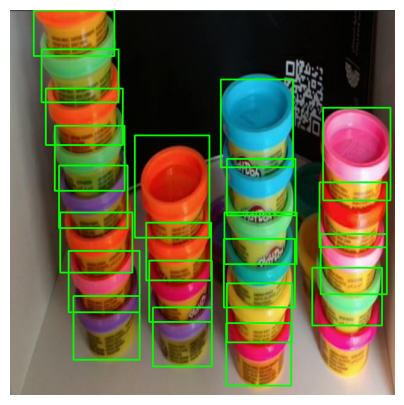

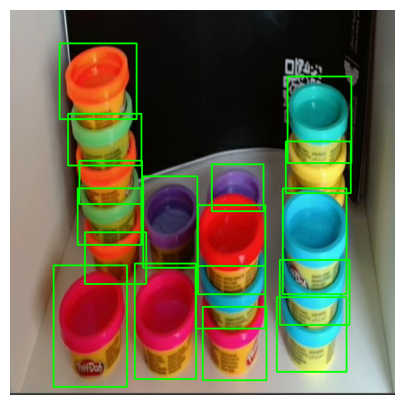

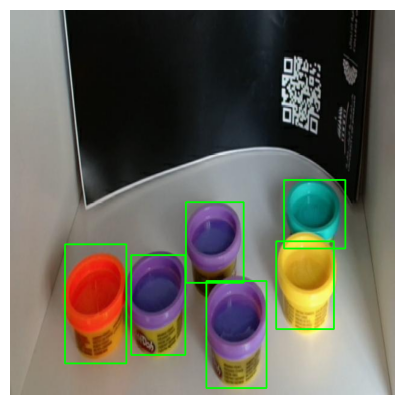

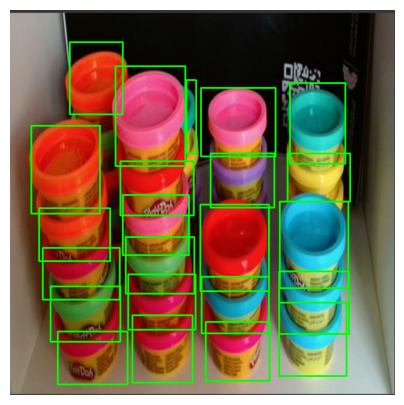

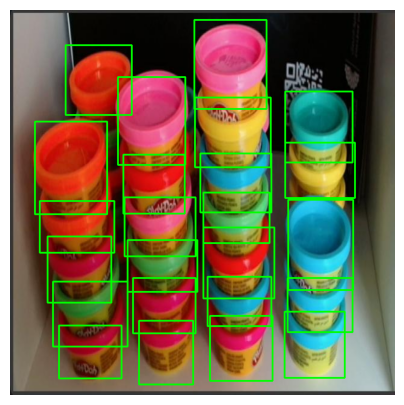

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import glob

# Load dataset (Change paths to your dataset directory)
img_paths = glob.glob("/content/item-count/train/images/*.jpg")[:5]
label_paths = [p.replace("images", "labels").replace(".jpg", ".txt") for p in img_paths]

# Load your trained YOLO model (replace with the correct path to `best.pt`)
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Plot images with labels
for img_path, label_path in zip(img_paths, label_paths):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Read labels
    with open(label_path, "r") as f:
        labels = f.readlines()

    # Draw bounding boxes
    h, w, _ = img.shape
    for label in labels:
        cls, x, y, bw, bh = map(float, label.split())
        x, y, bw, bh = int(x * w), int(y * h), int(bw * w), int(bh * h)
        x1, y1, x2, y2 = x - bw // 2, y - bh // 2, x + bw // 2, y + bh // 2
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis("off")
    plt.show()


In [ ]:
# Get object class names from YOLO model
class_names = model.names

# Define the object class you want to count (change as needed)
target_class = "cup"  # Example: Count only bottles

# Count objects of the specific class
count = sum(1 for d in detections if class_names[int(d[5])] == target_class)
print(f"Number of {target_class}s detected: {count}")


Number of cups detected: 6


Using device: cpu


<IPython.core.display.Javascript object>

Image saved to photo_20250227_101727.jpg

image 1/1 /content/photo_20250227_101727.jpg: 480x640 7 cans, 103.9ms
Speed: 1.3ms preprocess, 103.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
Total objects detected: 7
Total cans detected: 7


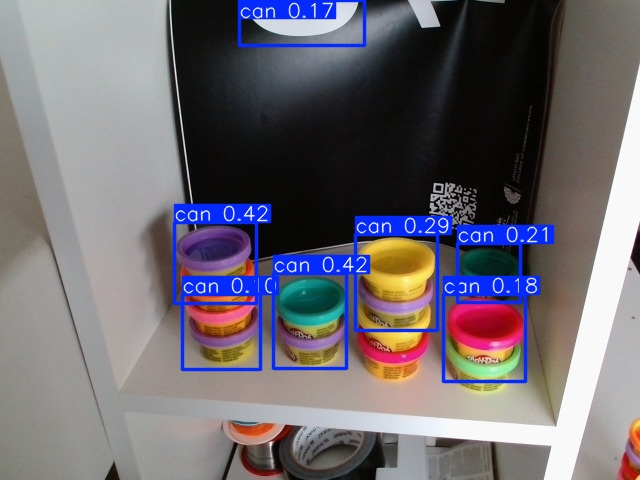

Waiting for 2 minutes before capturing the next image...


<IPython.core.display.Javascript object>

Image saved to photo_20250227_101738.jpg

image 1/1 /content/photo_20250227_101738.jpg: 480x640 7 cans, 101.9ms
Speed: 2.2ms preprocess, 101.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
Total objects detected: 7
Total cans detected: 7


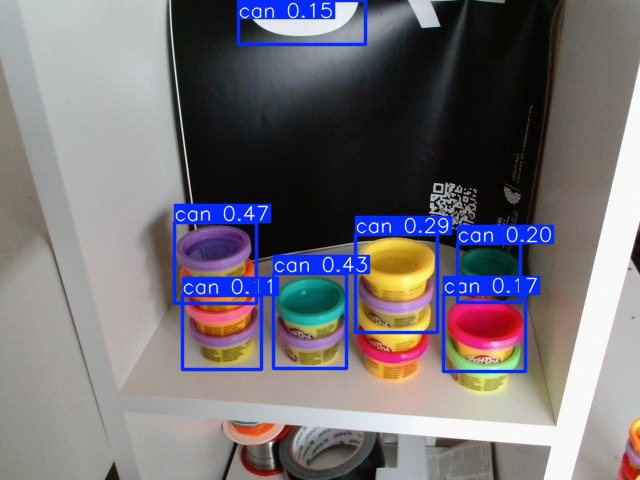

Waiting for 2 minutes before capturing the next image...


KeyboardInterrupt: 

In [ ]:
import time
import cv2
import numpy as np
import torch
import datetime
from ultralytics import YOLO
from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64
from PIL import Image

# Auto-detect device (GPU or CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the YOLOv8 model (ensure the correct path to your trained weights)
model = YOLO("runs/detect/train/weights/best.pt")

# JavaScript to capture an image
def take_photo():
    js = Javascript('''
        async function takePhoto(quality) {
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });
            video.srcObject = stream;
            await video.play();

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')

    display(js)
    data = eval_js("takePhoto()")
    binary = base64.b64decode(data.split(',')[1])

    # Save the image with a timestamp to prevent overwriting
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'photo_{timestamp}.jpg'

    with open(filename, "wb") as f:
        f.write(binary)

    return filename

# Function to detect objects
def detect_objects(image_path):
    results = model(image_path, conf=0.1, iou=0.4, imgsz=640, agnostic_nms=True, device=device)  # Use auto-detected device

    # Extract bounding boxes
    detections = results[0].boxes.data
    num_objects = len(detections)

    # Count only detected cans (Assumes "can" is labeled as class index 0 in your model)
    class_ids = results[0].boxes.cls.cpu().numpy()
    can_count = sum(class_id == 0 for class_id in class_ids)

    print(f"Total objects detected: {num_objects}")
    print(f"Total cans detected: {can_count}")

    # Save the detected image
    results[0].save(filename="detected.jpg")

    # Display the image in Google Colab
    detected_img = Image.open("detected.jpg")
    display(detected_img)

# Continuous loop to take a picture every 2 minutes and detect objects
while True:
    image_path = take_photo()
    print(f"Image saved to {image_path}")

    detect_objects(image_path)

    print("Waiting for 2 minutes before capturing the next image...")
    time.sleep(10)  # Correct sleep time


In [ ]:
!pip install firebase-admin


In [ ]:
import firebase_admin
from firebase_admin import credentials, firestore


In [ ]:
import firebase_admin
from firebase_admin import credentials, firestore

# Check if Firebase has already been initialized
if not firebase_admin._apps:
    cred = credentials.Certificate("/content/stock-detection-3a4a9-firebase-adminsdk-fbsvc-660d5f0f7d.json")
    firebase_admin.initialize_app(cred)

# Initialize Firestore
db = firestore.client()

# Create Firestore collection and document if they don't exist
db.collection('inventory').document('cups').set({
    'count': 0,  # Initial cup count
    'last_updated': firestore.SERVER_TIMESTAMP  # Will automatically use the current timestamp
})


print("✅ Firebase initialized successfully!")


✅ Firebase initialized successfully!


In [ ]:
doc_ref = db.collection("test").document("connection_test")
doc_ref.set({"status": "Connected successfully!"})
print("✅ Firestore is connected and test document is created!")


✅ Firestore is connected and test document is created!


Using device: cpu
✅ Firebase connected successfully!


<IPython.core.display.Javascript object>

📸 Image saved to photo_20250227_122124.jpg

image 1/1 /content/photo_20250227_122124.jpg: 480x640 11 cans, 103.0ms
Speed: 1.6ms preprocess, 103.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)
Total objects detected: 11
Total cans detected: 11
🔥 Firestore updated: 11 cans


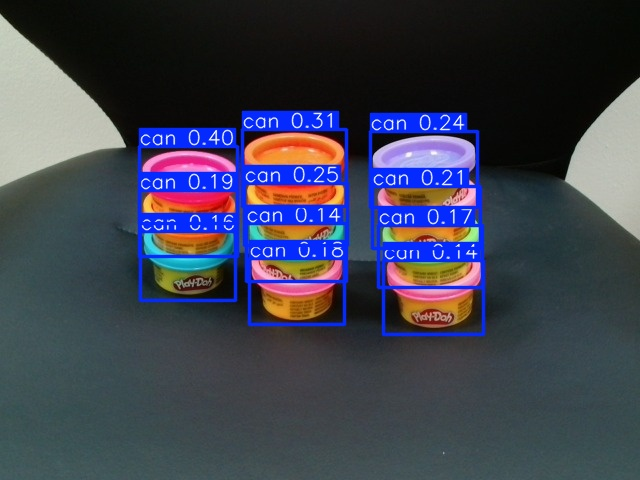

⏳ Waiting for 2 minutes before capturing the next image...


<IPython.core.display.Javascript object>

📸 Image saved to photo_20250227_122137.jpg

image 1/1 /content/photo_20250227_122137.jpg: 480x640 7 cans, 100.4ms
Speed: 2.1ms preprocess, 100.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
Total objects detected: 7
Total cans detected: 7
🔥 Firestore updated: 7 cans


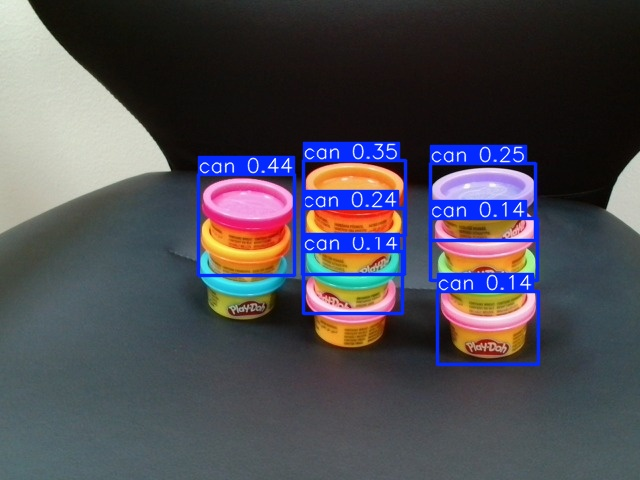

⏳ Waiting for 2 minutes before capturing the next image...


<IPython.core.display.Javascript object>

📸 Image saved to photo_20250227_122148.jpg

image 1/1 /content/photo_20250227_122148.jpg: 480x640 6 cans, 115.0ms
Speed: 2.0ms preprocess, 115.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)
Total objects detected: 6
Total cans detected: 6
🔥 Firestore updated: 6 cans


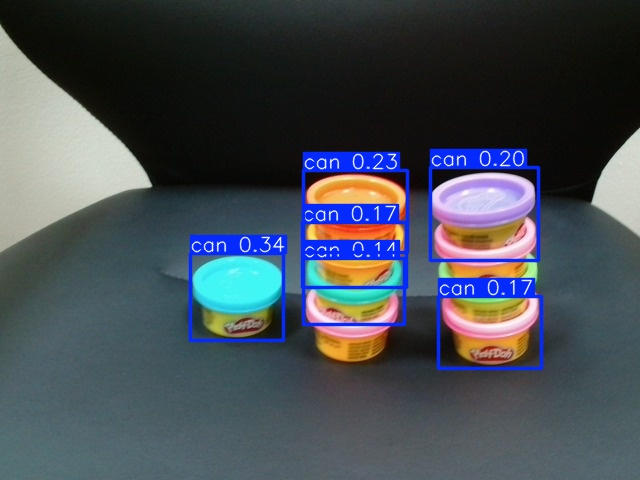

⏳ Waiting for 2 minutes before capturing the next image...


<IPython.core.display.Javascript object>

📸 Image saved to photo_20250227_122159.jpg

image 1/1 /content/photo_20250227_122159.jpg: 480x640 10 cans, 106.3ms
Speed: 2.2ms preprocess, 106.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
Total objects detected: 10
Total cans detected: 10
🔥 Firestore updated: 10 cans


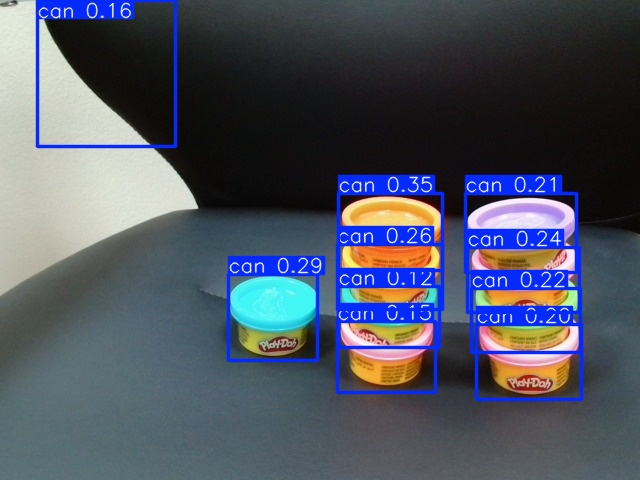

⏳ Waiting for 2 minutes before capturing the next image...


<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [ ]:
import time
import cv2
import numpy as np
import torch
import datetime
from ultralytics import YOLO
from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64
from PIL import Image
import firebase_admin
from firebase_admin import credentials, firestore

# ✅ Auto-detect device (GPU or CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# ✅ Load the YOLOv8 model (ensure the correct path to your trained weights)
model = YOLO("runs/detect/train/weights/best.pt")

# ✅ Initialize Firebase Firestore
if not firebase_admin._apps:
    cred = credentials.Certificate("/content/stock-detection-3a4a9-firebase-adminsdk-fbsvc-660d5f0f7d.json")  # Ensure correct path
    firebase_admin.initialize_app(cred)
db = firestore.client()
print("✅ Firebase connected successfully!")

# ✅ JavaScript to capture an image
def take_photo():
    js = Javascript('''
        async function takePhoto(quality) {
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });
            video.srcObject = stream;
            await video.play();

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')

    display(js)
    data = eval_js("takePhoto()")
    binary = base64.b64decode(data.split(',')[1])

    # Save the image with a timestamp to prevent overwriting
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'photo_{timestamp}.jpg'

    with open(filename, "wb") as f:
        f.write(binary)

    return filename

# ✅ Function to update Firestore with the detected count
def update_firestore(can_count):
    doc_ref = db.collection('inventory').document('cups')
    doc_ref.update({
        'count': int(can_count),  # 🔥 Convert NumPy int64 to Python int
        'last_updated': firestore.SERVER_TIMESTAMP
    })
    print(f"🔥 Firestore updated: {int(can_count)} cans")


# ✅ Function to detect objects and update the database
def detect_objects(image_path):
    results = model(image_path, conf=0.1, iou=0.4, imgsz=640, agnostic_nms=True, device=device)

    # Extract bounding boxes
    detections = results[0].boxes.data
    num_objects = len(detections)

    # Count only detected cans (Assumes "can" is labeled as class index 0 in your model)
    class_ids = results[0].boxes.cls.cpu().numpy()
    can_count = sum(class_id == 0 for class_id in class_ids)

    print(f"Total objects detected: {num_objects}")
    print(f"Total cans detected: {can_count}")

    # 🔥 Update Firestore with the new can count
    update_firestore(can_count)

    # Save the detected image
    results[0].save(filename="detected.jpg")

    # Display the image in Google Colab
    detected_img = Image.open("detected.jpg")
    display(detected_img)

# ✅ Continuous loop to take a picture every 2 minutes and update Firestore
while True:
    image_path = take_photo()
    print(f"📸 Image saved to {image_path}")

    detect_objects(image_path)

    print("⏳ Waiting for 2 minutes before capturing the next image...")
    time.sleep(10)  # 2-minute delay
